In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.random.set_seed(42)

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
class_names = [
    "T-shirt/top",   # 0
    "Trouser",       # 1
    "Pullover",      # 2
    "Dress",         # 3
    "Coat",          # 4
    "Sandal",        # 5
    "Shirt",         # 6
    "Sneaker",       # 7
    "Bag",           # 8
    "Ankle boot"     # 9
]

In [6]:
unique, counts = np.unique(y_train, return_counts=True)

for label, count in zip(unique, counts):
    print(f"{class_names[label]:<12}: {count}")

T-shirt/top : 6000
Trouser     : 6000
Pullover    : 6000
Dress       : 6000
Coat        : 6000
Sandal      : 6000
Shirt       : 6000
Sneaker     : 6000
Bag         : 6000
Ankle boot  : 6000


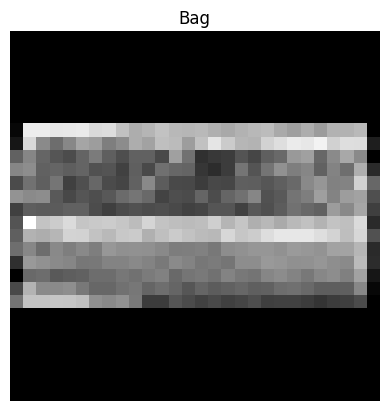

In [7]:
idx = np.random.randint(0, len(X_train))
plt.imshow(X_train[idx], cmap="gray")
plt.title(class_names[y_train[idx]])
plt.axis("off")
plt.show()

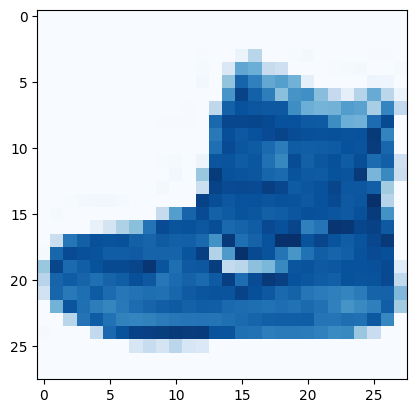

In [8]:
plt.imshow(X_train[0], cmap="Blues")

In [9]:
pd.DataFrame(X_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,54,0,0,0,1,3,4,0,0,3
5,0,0,0,0,0,0,0,0,0,0,...,144,123,23,0,0,0,0,12,10,0
6,0,0,0,0,0,0,0,0,0,0,...,107,156,161,109,64,23,77,130,72,15
7,0,0,0,0,0,0,0,0,0,0,...,216,163,127,121,122,146,141,88,172,66
8,0,0,0,0,0,0,0,0,0,1,...,223,223,215,213,164,127,123,196,229,0
9,0,0,0,0,0,0,0,0,0,0,...,235,227,224,222,224,221,223,245,173,0


In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Flatten

In [12]:
# Create the model
model_1 = tf.keras.Sequential([
  Input(shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  Flatten(),
  Dense(10, activation="relu"),
  Dense(10, activation="relu"),
  Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
history_1 = model_1.fit(X_train,
                        y_train,
                        epochs=10,
                        validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7400 - loss: 0.7354 - val_accuracy: 0.8174 - val_loss: 0.5297
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8346 - loss: 0.4785 - val_accuracy: 0.8323 - val_loss: 0.4808
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8487 - loss: 0.4389 - val_accuracy: 0.8385 - val_loss: 0.4619
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8551 - loss: 0.4162 - val_accuracy: 0.8391 - val_loss: 0.4577
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8590 - loss: 0.4011 - val_accuracy: 0.8418 - val_loss: 0.4527
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8618 - loss: 0.3910 - val_accuracy: 0.8421 - val_loss: 0.4491
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8637 - loss: 0.3836 - val_accuracy: 0.8439 - val_loss: 0.4450
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8651 - loss: 0.3774 - 

In [16]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,212 (94.58 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,142 (63.06 KB)

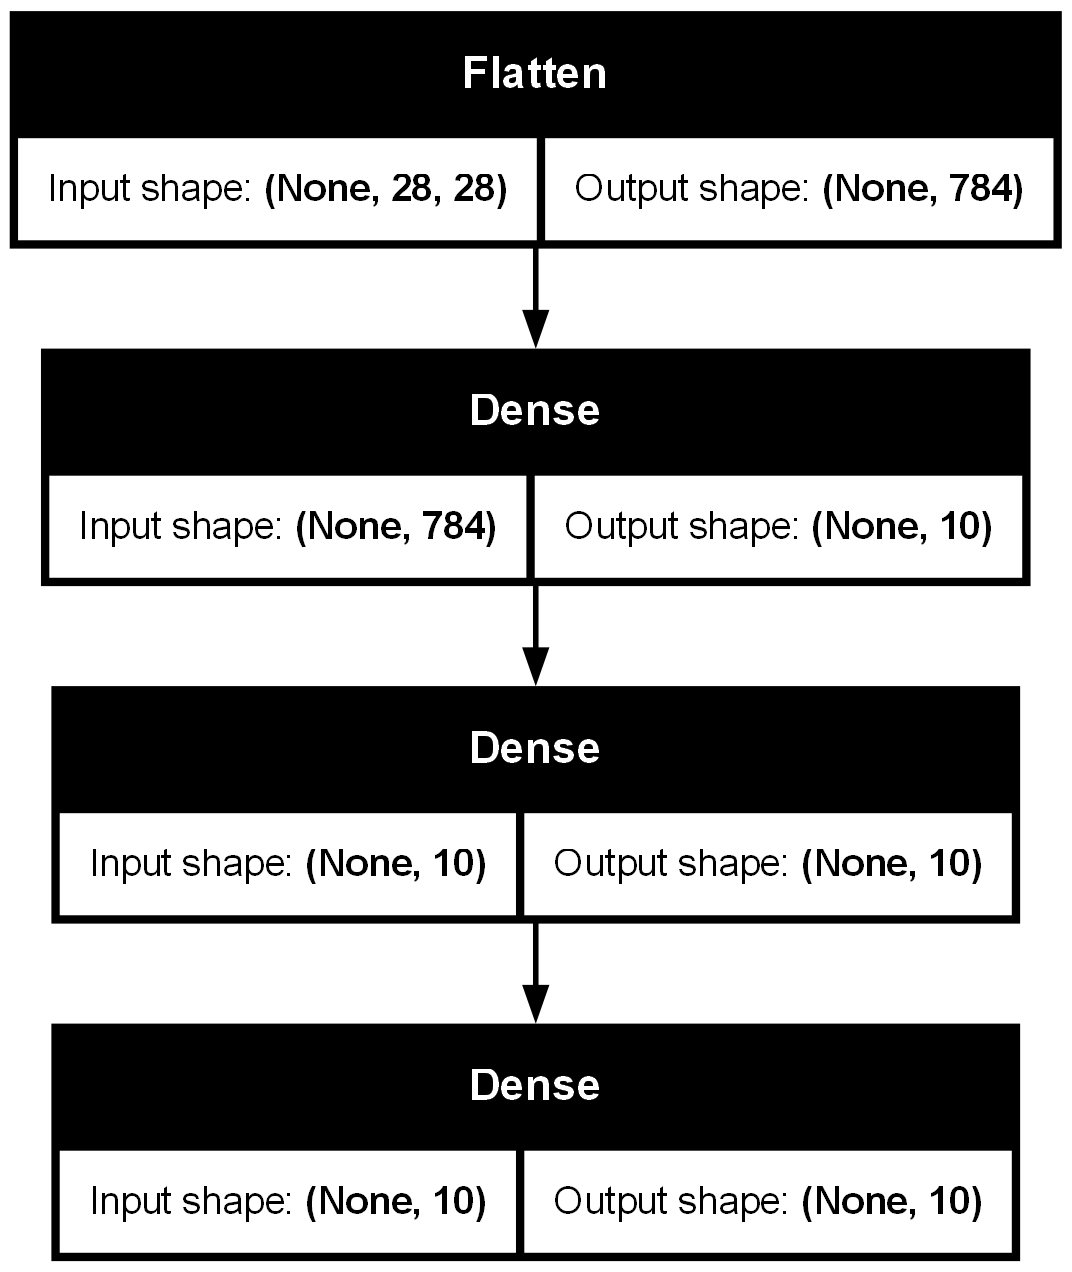

In [19]:

from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes=True)

In [20]:
# Create the model
model_2 = tf.keras.Sequential([
  Input(shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  Flatten(),
  Dense(10, activation="relu"),
  Dense(10, activation="relu"),
  Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
history_2 = model_2.fit(X_train,
                        y_train,
                        epochs=20,
                        validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7274 - loss: 0.7498 - val_accuracy: 0.8055 - val_loss: 0.5437
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8288 - loss: 0.4897 - val_accuracy: 0.8338 - val_loss: 0.4869
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8436 - loss: 0.4503 - val_accuracy: 0.8398 - val_loss: 0.4667
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8494 - loss: 0.4318 - val_accuracy: 0.8425 - val_loss: 0.4555
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8528 - loss: 0.4202 - val_accuracy: 0.8444 - val_loss: 0.4480
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8558 - loss: 0.4112 - val_accuracy: 0.8452 - val_loss: 0.4424
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8589 - loss: 0.4028 - val_accuracy: 0.8471 - val_loss: 0.4385
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8615 - loss: 0.3958 - 

In [21]:
from tensorflow.keras import regularizers

In [22]:
# Create the model
model_3 = tf.keras.Sequential([
  Input(shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  Flatten(),
  Dense(10, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
  Dense(10, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
  Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
history_3 = model_3.fit(X_train,
                        y_train,
                        epochs=20,
                        validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7527 - loss: 0.9649 - val_accuracy: 0.8045 - val_loss: 0.7872
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8102 - loss: 0.7463 - val_accuracy: 0.8132 - val_loss: 0.7249
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8165 - loss: 0.7016 - val_accuracy: 0.8152 - val_loss: 0.6918
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8205 - loss: 0.6753 - val_accuracy: 0.8202 - val_loss: 0.6674
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8227 - loss: 0.6552 - val_accuracy: 0.8229 - val_loss: 0.6510
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8255 - loss: 0.6405 - val_accuracy: 0.8231 - val_loss: 0.6374
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8257 - loss: 0.6289 - val_accuracy: 0.8251 - val_loss: 0.6315
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8267 - loss: 0.6196 - 

In [23]:
# Create the model
model_4 = tf.keras.Sequential([
  Input(shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  Flatten(),
  Dense(10, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
  Dense(10, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
  Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20))

# Fit the model (to the normalized data)
history_4 = model_4.fit(X_train,
                        y_train,
                        epochs=40,
                        validation_data=(X_test, y_test),
                        callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5020 - loss: 1.7190 - val_accuracy: 0.6448 - val_loss: 1.2273 - learning_rate: 1.0000e-04
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7091 - loss: 1.0744 - val_accuracy: 0.7276 - val_loss: 1.0069 - learning_rate: 1.1220e-04
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7676 - loss: 0.9314 - val_accuracy: 0.7708 - val_loss: 0.9064 - learning_rate: 1.2589e-04
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7951 - loss: 0.8499 - val_accuracy: 0.7904 - val_loss: 0.8420 - learning_rate: 1.4125e-04
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8065 - loss: 0.7970 - val_accuracy: 0.7997 - val_loss: 0.7986 - learning_rate: 1.5849e-04
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8149 - loss: 0.7595 - val_accuracy: 0.8064 - val_loss: 0.7660 - learning_rate: 1.7783e-04
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/ste

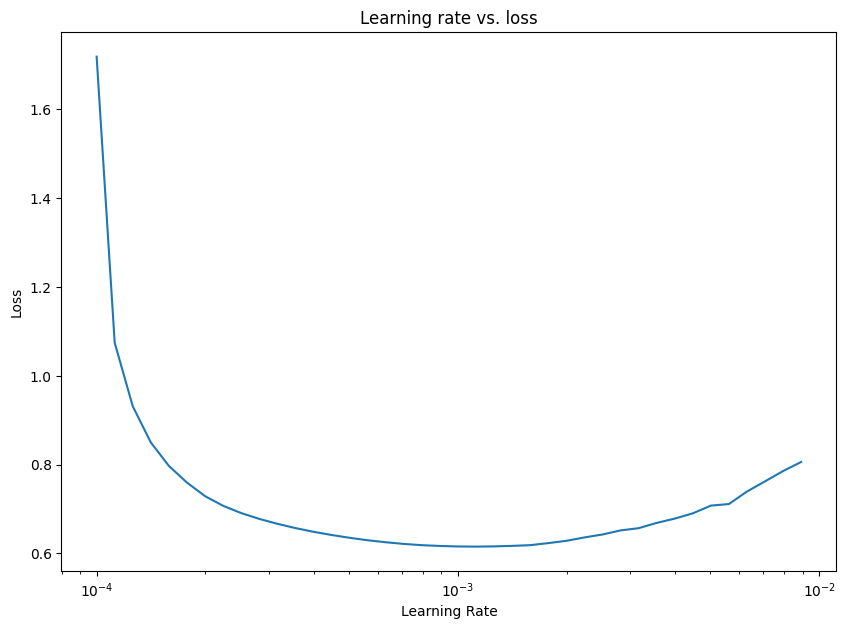

In [24]:
lrs = 1e-4 * (10 ** (np.arange(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_4.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [25]:
y_prob = model_3.predict(X_test)
y_prob[:3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.5532859e-06, 1.4616747e-07, 1.5489608e-05, 6.6309171e-05,
        1.8859386e-05, 1.6093242e-01, 1.2171989e-06, 2.2225362e-01,
        1.0615858e-02, 6.0608953e-01],
       [1.9614238e-03, 1.2728616e-04, 8.8629699e-01, 1.0263207e-03,
        1.5305777e-02, 6.5040675e-09, 9.4568767e-02, 8.2826227e-16,
        7.1338681e-04, 2.9849396e-08],
       [2.0709772e-04, 9.9919456e-01, 9.8462651e-06, 2.5849568e-04,
        3.1989321e-04, 4.9799365e-10, 1.0000368e-05, 1.2614788e-13,
        1.2964571e-07, 4.1036249e-10]], dtype=float32)

In [26]:
y_prob[1].argmax()

np.int64(2)

In [27]:
class_names[y_prob[1].argmax()]

'Pullover'

In [28]:
y_pred = y_prob.argmax(axis=1)

In [29]:
y_pred[:3]

array([9, 2, 1])

In [30]:
y_prob[:3]

array([[6.5532859e-06, 1.4616747e-07, 1.5489608e-05, 6.6309171e-05,
        1.8859386e-05, 1.6093242e-01, 1.2171989e-06, 2.2225362e-01,
        1.0615858e-02, 6.0608953e-01],
       [1.9614238e-03, 1.2728616e-04, 8.8629699e-01, 1.0263207e-03,
        1.5305777e-02, 6.5040675e-09, 9.4568767e-02, 8.2826227e-16,
        7.1338681e-04, 2.9849396e-08],
       [2.0709772e-04, 9.9919456e-01, 9.8462651e-06, 2.5849568e-04,
        3.1989321e-04, 4.9799365e-10, 1.0000368e-05, 1.2614788e-13,
        1.2964571e-07, 4.1036249e-10]], dtype=float32)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

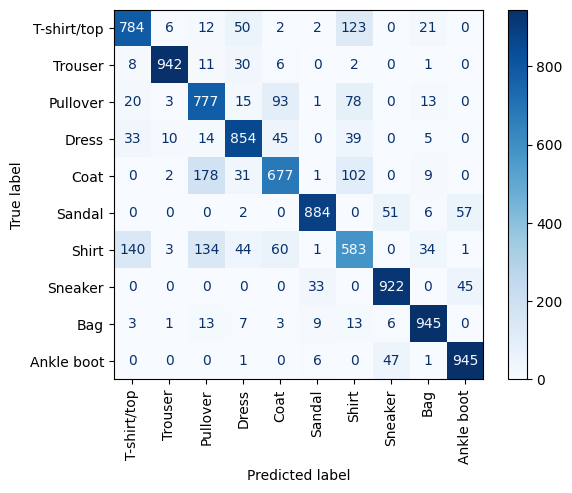

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels= class_names)
disp.plot(cmap="Blues", xticks_rotation="vertical")


In [35]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.78      0.79      1000
     Trouser       0.97      0.94      0.96      1000
    Pullover       0.68      0.78      0.73      1000
       Dress       0.83      0.85      0.84      1000
        Coat       0.76      0.68      0.72      1000
      Sandal       0.94      0.88      0.91      1000
       Shirt       0.62      0.58      0.60      1000
     Sneaker       0.90      0.92      0.91      1000
         Bag       0.91      0.94      0.93      1000
  Ankle boot       0.90      0.94      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



In [37]:
import random

# A function for plotting a random image along with its prediction
# Courtesy of ZTM -
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


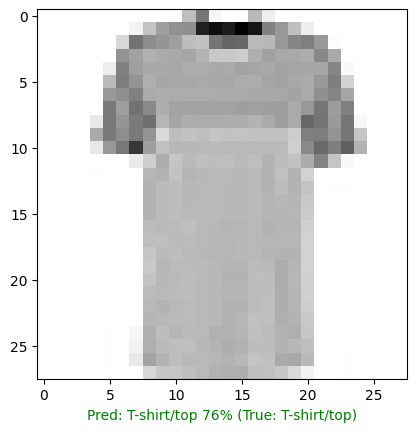

In [58]:
plot_random_image(model_3, X_test, y_test, class_names)